# Projenin amacı : 
finansal veriler üzerinde analiz yaparak, belirli bir hisse senedinin kapanış değerini etkileyen faktörleri anlamak, bu faktörler arasındaki ilişkileri görselleştirmek ve bu veri analizi sonucunda regresyon modeli kullanarak gelecekteki kapanış değerini tahmin etmeye çalışmaktır.

# Projenin Adımları : 
1 - Hisse senedi verilerinin toplanması ve kullanılabilir hale getirilmesi.<br>
(selenium kütüphanesi kullanmıştır veri çekme aşamasının kodu github hesabımda mevcutur)<br>
2 - Veri ön işleme adımları ile null değerlerin temizlenmesi ve verilerin normalizasyonu.<br>
3 - İlişki analizi ile değişkenler arasındaki bağlantıların anlaşılması.(Görselleştirme)<br>
4 - Regresyon modeli kullanarak gelecekteki kapanış değerini tahmin etme.<br>


<h3>geliştiren  : Hüseyin Erol</h3>

In [136]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

Pandas : veri analizi ve manipülasyonu,<br>
NumPy : bilimsel hesaplamalar,<br>
Seaborn : istatistiksel veri görselleştirmesi,<br>
Matplotlib : temel grafik çizimi için kullanılan Python kütüphaneleridir.<br>

In [2]:
exel_verisi = pd.read_excel("dnıs.xlsx")

"dnıs.xlsx" adlı Excel dosyasındaki veriyi Pandas kütüphanesi aracılığıyla exel_verisi değişkenine atadım

In [3]:
exel_verisi.head() #veri setimizin ilk 5 elamanı 

,Kapanış,Min,Max,aof,Hacim,Sermaye,usd_try,bist_100,piyasa_degeri_tl,halka_acık_pd_tl
0,"0,86","0,86","0,86","0,86",227.444,25,"7,4127",1.076,96.0,33
1,"0,95","0,95","0,95","0,95",181.777,25,"7,4267",1.086,105.0,37
2,"1,04","1,04","1,04","1,04",272.457,25,"7,4483",1.097,115.0,40
3,"1,14","1,14","1,14","1,14",584.948,25,"7,4672",1.090,127.0,44
4,"1,26","1,26","1,26","1,26",484.042,25,"7,4805",1.100,139.0,49


In [4]:
exel_verisi["usd_try"] = exel_verisi["usd_try"].str.replace(",",".").astype(float)

In [5]:
exel_verisi["Kapanış"] =exel_verisi["Kapanış"].str.replace(",",".").astype(float)

In [6]:
exel_verisi["Min"] =exel_verisi["Min"].str.replace(",",".").astype(float)

In [7]:
exel_verisi["Max"] =exel_verisi["Max"].str.replace(",",".").astype(float)

In [8]:
exel_verisi["aof"] =exel_verisi["aof"].str.replace(",",".").astype(float)

In [10]:
exel_verisi["Hacim"]  =exel_verisi["Hacim"].str.replace(".","").astype(float)

sütunundaki değerlerdeki virgül (",") karakterlerini nokta (".") ile değiştirdim ve ardından bu sütunu ondalık sayı tipine dönüştürdüm bunun sebebi Python'da ondalık sayılar virgülle değil, nokta ile ayrılır..
ve astype() methodu ile verinin tipini değiştirdim bunun sebebi : Çünkü sayısal bir veri tipine dönüştürülmemiş bir string, matematiksel işlemler sırasında hatalara neden olabilir.

In [28]:
exel_verisi[780:len(exel_verisi)] #baş ve sondan bir kaç veriyi kontrol ettim

,Kapanış,Min,Max,aof,Hacim,Sermaye,usd_try,bist_100,piyasa_degeri_tl,halka_acık_pd_tl
780,11.62,11.30,11.95,11.69,11110710.0,120,28.0163,7.843,1.391,604
781,11.98,11.59,12.36,12.08,20282358.0,120,28.0153,7.769,1.434,623
782,11.52,11.34,11.93,11.54,13189518.0,120,28.0218,7.511,1.379,599
783,11.86,11.40,12.11,11.75,12423053.0,120,28.0608,7.750,1.420,617
784,12.27,11.86,12.31,12.16,14563577.0,120,28.1042,7.990,1.469,638
785,11.58,11.58,12.39,12.10,13098642.0,120,28.1313,7.425,1.386,602
786,11.88,11.09,12.11,11.72,16473360.0,120,28.1532,7.662,1.422,618
787,11.90,11.55,12.00,11.75,8797531.0,120,28.1765,7.706,1.425,619
788,11.77,11.70,12.04,11.86,8198417.0,120,28.2552,7.713,1.409,612
789,11.13,11.13,12.10,11.62,10257145.0,120,28.2874,7.514,1.333,579


<h2>Null deger kontrolü</h2>

In [30]:
null_kontrol = exel_verisi.isnull().any()
null_sutunlar = null_kontrol[null_kontrol].index
null_sutunlar

Index(['Hacim', 'usd_try'], dtype='object')

['Hacim', 'usd_try'] colonlarımızda null deger varmış toplam kaç adet null degerimiz var onu ögrenelim 

In [31]:
toplam_null_deger_sayisi  = exel_verisi.isnull().sum().sum()
print(f"{toplam_null_deger_sayisi} adet null degerimiz var ")

2 adet null degerimiz var 


null deger sayımız az bulundukları  satırları silmek bize cok büyük bir veri kabına sebep olmaz

In [32]:
satirlar_null = exel_verisi[exel_verisi.isnull().any(axis=1)]
print(satirlar_null)
#124. satırda 2 verimiz yok 

     Kapanış   Min  Max   aof  Hacim  Sermaye  usd_try  bist_100  \
124     3.85  3.67  3.9  3.82    NaN       26      NaN     1.527   

     piyasa_degeri_tl  halka_acık_pd_tl  
124             454.0               184  


In [34]:
exel_verisi[121:126] # tablo üzerinde tekrar kontrol edelim

,Kapanış,Min,Max,aof,Hacim,Sermaye,usd_try,bist_100,piyasa_degeri_tl,halka_acık_pd_tl
121,3.77,3.77,4.04,3.88,22314336.0,26,7.1485,1.483,445.0,180
122,3.68,3.46,3.97,3.71,22170305.0,26,7.2054,1.488,435.0,176
123,3.63,3.42,3.66,3.57,15776842.0,26,7.3841,1.471,429.0,174
124,3.85,3.67,3.90,3.82,NaN,26,NaN,1.527,454.0,184
125,3.80,3.76,3.93,3.81,15874095.0,26,7.3248,1.529,449.0,182


In [35]:
#124 satırda 2 adet nan degerimi var nan degeri silmek için
exel_verisi = exel_verisi.drop(124, axis=0)

In [36]:
exel_verisi[121:126] # nan degerli satırı sildim 

,Kapanış,Min,Max,aof,Hacim,Sermaye,usd_try,bist_100,piyasa_degeri_tl,halka_acık_pd_tl
121,3.77,3.77,4.04,3.88,22314336.0,26,7.1485,1.483,445.0,180
122,3.68,3.46,3.97,3.71,22170305.0,26,7.2054,1.488,435.0,176
123,3.63,3.42,3.66,3.57,15776842.0,26,7.3841,1.471,429.0,174
125,3.80,3.76,3.93,3.81,15874095.0,26,7.3248,1.529,449.0,182
126,3.87,3.78,3.99,3.89,32613449.0,27,7.3524,1.531,466.0,188


In [37]:
#başka null deger var mı kontrolün yapalım
if(exel_verisi.isnull().sum().sum() == 0):
    print("null deger yok")
else:
    print("null deger bulunuyor")

null deger yok


# Veri Görselleştirme Aşaması

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


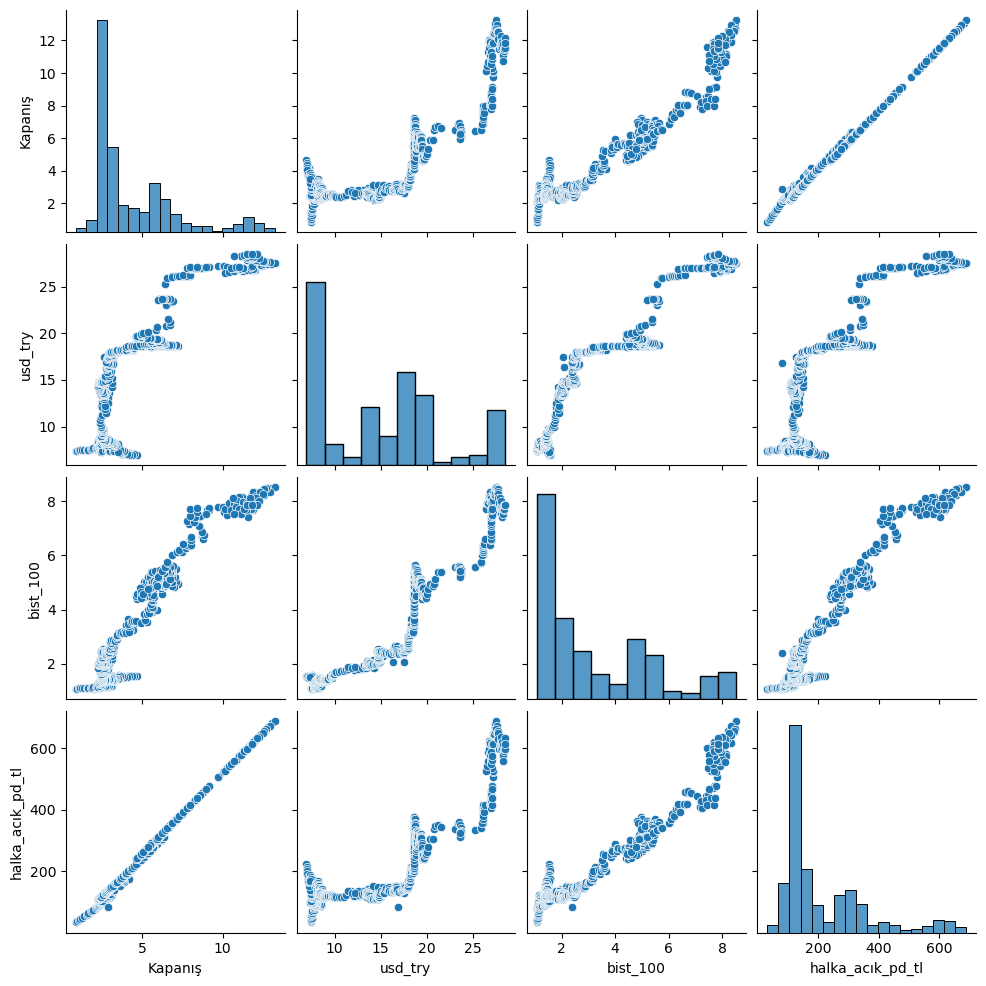

In [38]:
sbn.pairplot(exel_verisi[["Kapanış","usd_try","bist_100","halka_acık_pd_tl"]]) #genel görünüm
# veri setindeki değişkenler arasındaki ilişkiyi daha iyi anlamak ve analiz etmek için 
#sbn.pairplot kullandım

<Axes: xlabel='bist_100', ylabel='piyasa_degeri_tl'>

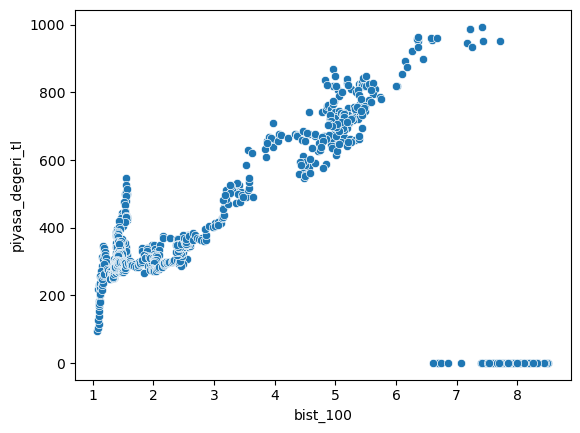

In [39]:
sbn.scatterplot(x = exel_verisi["bist_100"],y = exel_verisi["piyasa_degeri_tl"])
#bist_100 ile piyasa_degeri_tl arasındaki ilişkiyi anlamak adına
#scatter plot (dağılım grafiği) oluşturulmuştur.

<Axes: xlabel='Kapanış', ylabel='Hacim'>

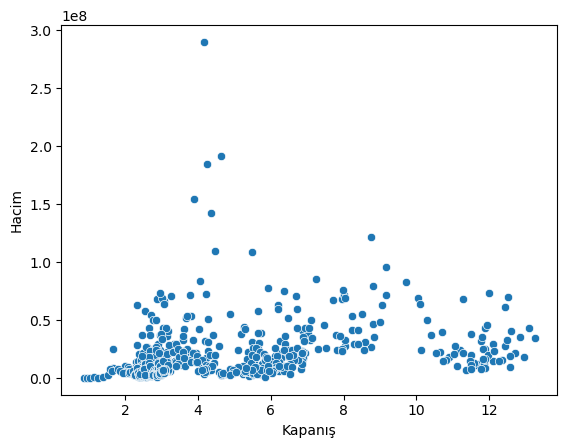

In [40]:
sbn.scatterplot(x = exel_verisi["Kapanış"],y = exel_verisi["Hacim"])
#Kapanış ile Hacim arasındaki ilişkiyi anlamak adına scatter plot (dağılım grafiği) oluşturulmuştur.

Text(0.5, 1.0, 'Korelasyon matrisi Kapanış - Hacim ')

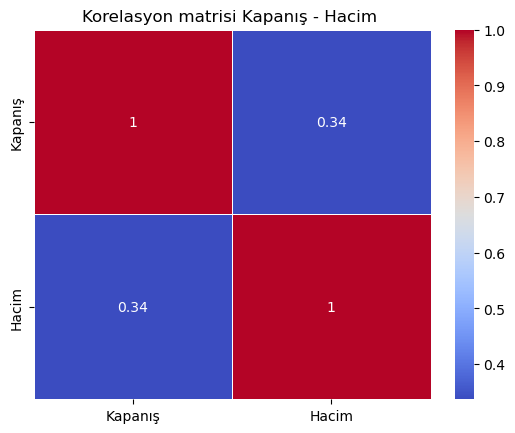

In [41]:
veri_seti_kolerasyon_matrisi = exel_verisi[["Kapanış","Hacim"]]
veri_seti_kolerasyon_matrisi = veri_seti_kolerasyon_matrisi.corr()
sbn.heatmap(veri_seti_kolerasyon_matrisi, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Korelasyon matrisi Kapanış - Hacim ")

0.34'lük bir korelasyon katsayısı, pozitif bir ilişki olduğunu, ancak bu ilişkinin güçlü olmadığını gösterir. Yani, "Hacim" ile "Kapanış" arasındaki ilişki, bir değişken arttığında diğerinin de artmasına doğru bir eğilim gösteriyor, ancak bu eğilim zayıf.

Text(0.5, 1.0, 'Korelasyon matrisi Kapanış - Hacim ')

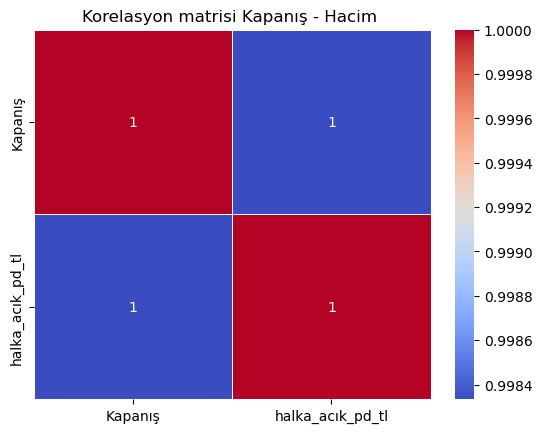

In [42]:
veri_seti_kolerasyon_matrisi = exel_verisi[["Kapanış","halka_acık_pd_tl"]]
veri_seti_kolerasyon_matrisi = veri_seti_kolerasyon_matrisi.corr()
sbn.heatmap(veri_seti_kolerasyon_matrisi, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Korelasyon matrisi Kapanış - Hacim ")

"Kapanış" ve "halka_acık_pd_tl" arasındaki korelasyon katsayısı 1 ise, bu iki değişken arasında mükemmel bir doğrusal ilişki vardır. Bir değişken artarken diğer değişken de tam olarak orantılı bir şekilde artar

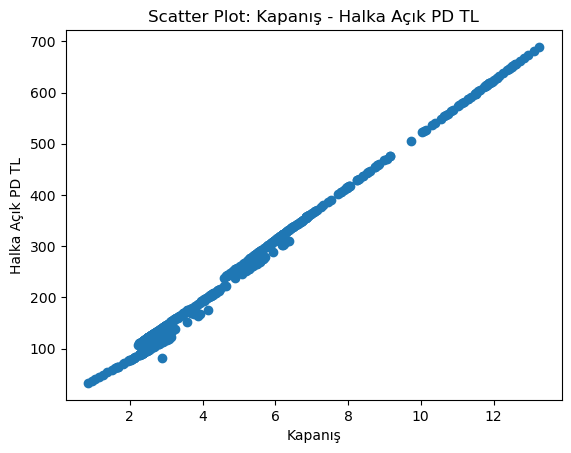

In [43]:
plt.scatter(exel_verisi["Kapanış"], exel_verisi["halka_acık_pd_tl"])
plt.xlabel("Kapanış")
plt.ylabel("Halka Açık PD TL")
plt.title("Scatter Plot: Kapanış - Halka Açık PD TL")
plt.show()

<Axes: >

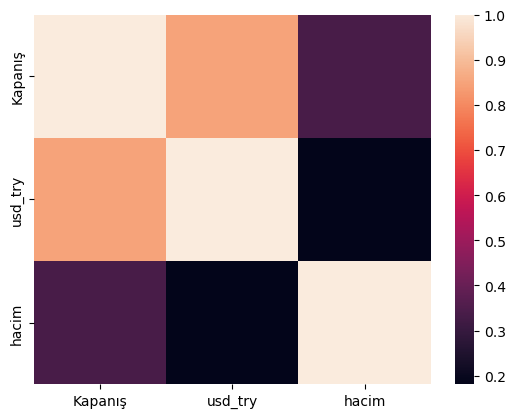

In [44]:
data1 = exel_verisi["Kapanış"].astype(float)
data2 = exel_verisi["usd_try"].astype(float)
data3 = exel_verisi["Hacim"]
data_frame = pd.DataFrame({'Kapanış': data1, 'usd_try': data2,"hacim":data3})


corr = data_frame.corr()

sbn.heatmap(corr)
#Bu heatmap, korelasyon katsayılarını renkli bir şekilde gösterir ve değişkenler arasındaki ilişkileri
#daha kolay anlamamıza yardımcı olur. Bu görselleştirme, "Kapanış", "usd_try" ve "Hacim" 
#değişkenleri arasındaki ilişkileri anlamak için kullanılır.

<Axes: >

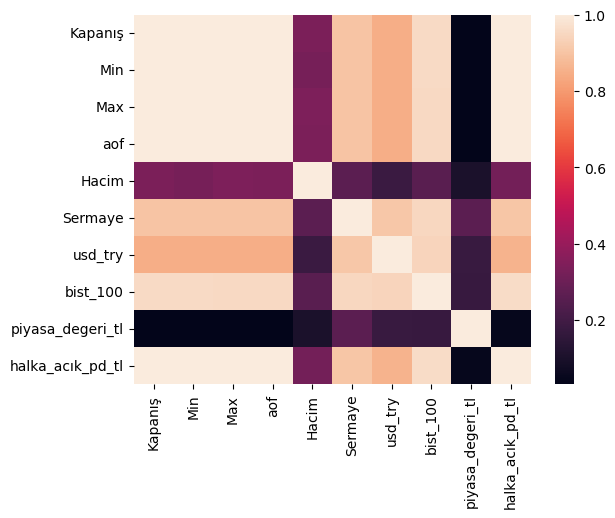

In [45]:
# bütün veri kümesinin ısın haritası
cor = exel_verisi.corr()
sbn.heatmap(cor)

Heatmap (ısı haritası), veri setindeki değerleri renkler aracılığıyla görsel olarak temsil eden bir grafik türüdür. Heatmap'ler, özellikle büyük ve karmaşık veri setlerindeki desenleri, korelasyonları ve gruplamaları anlamak için kullanılır.

<h1 style="color:red">Veri Seti Bölme ve Model Eğitme: Tahmin Modeli Geliştirme Aşamasına Geçiş</h1>

In [46]:
exel_verisi.head()

,Kapanış,Min,Max,aof,Hacim,Sermaye,usd_try,bist_100,piyasa_degeri_tl,halka_acık_pd_tl
0,0.86,0.86,0.86,0.86,227444.0,25,7.4127,1.076,96.0,33
1,0.95,0.95,0.95,0.95,181777.0,25,7.4267,1.086,105.0,37
2,1.04,1.04,1.04,1.04,272457.0,25,7.4483,1.097,115.0,40
3,1.14,1.14,1.14,1.14,584948.0,25,7.4672,1.090,127.0,44
4,1.26,1.26,1.26,1.26,484042.0,25,7.4805,1.100,139.0,49


In [47]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler 
from keras.optimizers import Adam

train_test_split : Veri setini eğitim ve test setlerine bölerek modelin performansını değerlendirmek için kullanılır

Sequential : Sıralı bir yapıda sinir ağı modelleri oluşturulurken kullanılır.

Dense : Sinir ağı modelindeki temel katmanlardan biridir

mean_absolute_error :  tahmin edilen değerler ile gerçek değerler arasındaki mutlak farkların ortalamasını ölçer. Regresyon modellerinin performansını değerlendirmek için kullanılır.

MinMaxScaler :  Veri setindeki sayısal değerleri belirli bir aralığa ölçeklendirmek için kullanılır.

Adam  =  modelin öğrenme hızını dinamik olarak ayarlarlamıza olanak sunar

denklem olarak y = ax+b olarak düşünürsek y degeri bizim ulaşmak istediğimiz deger yani 
Kapaniş degeri olurken a kısımında ise Kapanış degerini etikleyecek olan diger değişkenlerdir bu durumda

Bizim amacımız Kapanış  değerini diğer değişkenleri kullanarak bulmak. 
Bundan dolayı Doğrusal Regresyon kullanacagız

Doğrusal Regresyon: Doğrusal regresyon, bir bağımsız değişkenin diğer bağımsız değişken(ler) üzerindeki etkisini lineer bir denklemle modelleme yaklaşımıdır

In [53]:
y_degeri = exel_verisi["Kapanış"].values
# exeldeki Kapanış sütununu Numpy dizisi olarak y değişkenine attım

In [54]:
y[0:5] #görünüm şekli 

array([0.86, 0.95, 1.04, 1.14, 1.26])

In [55]:
x_degerleri  = exel_verisi[[ "Min", "Max", "aof", "Hacim", "Sermaye",
    "usd_try", "bist_100", "piyasa_degeri_tl", "halka_acık_pd_tl"]].values
#x_değerleri bizim ulaşmak istediğimiz y(Kapanış) değerlerini etkiyen değişkenlerdir
#bunları da numpy dizisi olarak aldım

In [56]:
x_degerleri

array([[  0.86 ,   0.86 ,   0.86 , ...,   1.076,  96.   ,  33.   ],
       [  0.95 ,   0.95 ,   0.95 , ...,   1.086, 105.   ,  37.   ],
       [  1.04 ,   1.04 ,   1.04 , ...,   1.097, 115.   ,  40.   ],
       ...,
       [ 11.47 ,  11.66 ,  11.55 , ...,   7.845,   1.378, 598.   ],
       [ 11.48 ,  12.2  ,  11.84 , ...,   7.861,   1.455, 632.   ],
       [ 11.75 ,  12.3  ,  12.   , ...,   7.841,   1.416, 615.   ]])

In [59]:
x_train,x_test,y_train,y_test  =train_test_split(x_degerleri,y_degeri,test_size=0.60)

x_degerleri: Bağımsız değişkenlerin değerlerini içeren veri seti.
y_degeri: Bağımlı değişkenin değerlerini içeren veri seti.
test_size=0.40: veri setinin %60'ı test seti olarak, geriye kalan %40'ı eğitim seti olarak kullanılacaktır.

In [60]:
print(x_train)
print(f"x_train degerinin elaman sayisi {len(x_train)}")
print(x_train.shape)

[[  2.51    2.85    2.69  ...   2.056 314.    128.   ]
 [  2.92    3.03    2.97  ...   1.45  354.    142.   ]
 [  5.39    5.53    5.44  ...   5.059 649.    282.   ]
 ...
 [  6.04    6.29    6.14  ...   5.269 724.    315.   ]
 [  5.3     5.6     5.46  ...   3.879 650.    265.   ]
 [  5.53    5.88    5.78  ...   5.438 694.    302.   ]]
x_train degerinin elaman sayisi 318
(318, 9)


In [61]:
x_test

array([[  3.77 ,   4.04 ,   3.88 , ...,   1.483, 445.   , 180.   ],
       [  2.65 ,   2.82 ,   2.69 , ...,   1.437, 318.   , 128.   ],
       [  2.62 ,   2.68 ,   2.65 , ...,   1.45 , 314.   , 126.   ],
       ...,
       [  4.65 ,   4.99 ,   4.78 , ...,   4.848, 588.   , 256.   ],
       [  2.56 ,   2.64 ,   2.59 , ...,   2.51 , 310.   , 125.   ],
       [  2.56 ,   2.69 ,   2.58 , ...,   1.858, 311.   , 126.   ]])

In [62]:
scaler = MinMaxScaler()

In [63]:
scaler.fit(x_train)

MinMaxScaler()

In [64]:
x_train = scaler.transform(x_train)
# degerleri 0 ile 1 arasına yerleştirddim performasnı arttırmak için
#veriler 0-1 arasına degerleri ile orantılı bir şekilde yerleştiriliyor

In [65]:
x_train[0:5]  #veri seti artık böyle görünüyor

array([[0.13055062, 0.15133779, 0.14150943, 0.04238389, 0.02105263,
        0.48877697, 0.1297524 , 0.31744007, 0.14170692],
       [0.1669627 , 0.16638796, 0.16552316, 0.01380834, 0.02105263,
        0.0657985 , 0.04776079, 0.35800826, 0.16425121],
       [0.38632327, 0.37541806, 0.37735849, 0.01758256, 0.57894737,
        0.55305433, 0.53605737, 0.65719873, 0.38969404],
       [0.51065719, 0.50167224, 0.50428816, 0.06381465, 0.57894737,
        0.5423739 , 0.55702882, 0.83265618, 0.51046699],
       [0.15186501, 0.15468227, 0.14922813, 0.01849338, 0.02105263,
        0.20615597, 0.10823975, 0.33366734, 0.15136876]])

In [66]:
scaler.fit(x_test)

MinMaxScaler()

In [67]:
x_test = scaler.transform(x_test)
# degerleri 0 ile 1 arasına yerleştirddim performasnı arttırmak için
#veriler 0-1 arasına degerleri ile orantılı bir şekilde yerleştiriliyor

In [68]:
x_test[0:5] #veri seti artık böyle görünüyor

array([[0.24029727, 0.25238095, 0.24433657, 0.11590995, 0.01052632,
        0.01029271, 0.05471901, 0.44711877, 0.22408537],
       [0.14781173, 0.15555556, 0.14805825, 0.05781017, 0.02105263,
        0.07957525, 0.04853455, 0.31922093, 0.14481707],
       [0.14533443, 0.14444444, 0.14482201, 0.02247488, 0.02105263,
        0.07223063, 0.05028233, 0.31519265, 0.14176829],
       [0.15689513, 0.16428571, 0.16343042, 0.08342416, 0.02105263,
        0.34206273, 0.13794031, 0.35144716, 0.16615854],
       [0.42031379, 0.41904762, 0.41909385, 0.02640319, 0.57894737,
        0.57954498, 0.54006453, 0.71701343, 0.4222561 ]])

<h1 style="color:green">Model Oluşturma Aşaması</h1>

In [83]:
model = Sequential()

model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1))

model.compile(optimizer ="adam",loss="mse")
model.fit(x_train,y_train,epochs=95,verbose = 0) #cıktısının cok uzun olamamıs için verbose = 0 kullandım

<img src="relu3.png">
Rectified Linear Units (ReLU) = ReLU fonksiyonu, giriş değeri pozitifse, giriş değerini olduğu gibi çıkışa verir. Eğer giriş değeri negatifse, çıkışı sıfır yapar. Yani, ReLU fonksiyonu, giriş değeri negatifse sıfır, pozitifse değeri olduğu gibi geçiren bir eşiği ifade eder.

<img src="maliyet.png">
Genelde kullanılan bir hata fonksiyonu örneği, regresyon problemleri için ortalama karesel hata (Mean Squared Error - MSE) fonksiyonudur. MSE, modelin tahminlerinin gerçek değerlerden sapmalarının karelerinin ortalamasını hesaplar. Bu, büyük sapmaların daha fazla vurgulanmasını sağlar.
n : elaman sayısını temsil eder

<h3>Özetle</h3>
Her epoch'ta, modelin maliyeti hesaplanır ve optimizasyon algoritmaları(Adam ,RMSProp) vb aracılığıyla hatanın minimum olduğu nokta bulunmaya çalışılır. Bu süreçte, ağırlıklar güncellenir ve nöronların içindeki denklemler, değişerek en dogru sonuca ulaşmamızı saglar 

<Axes: >

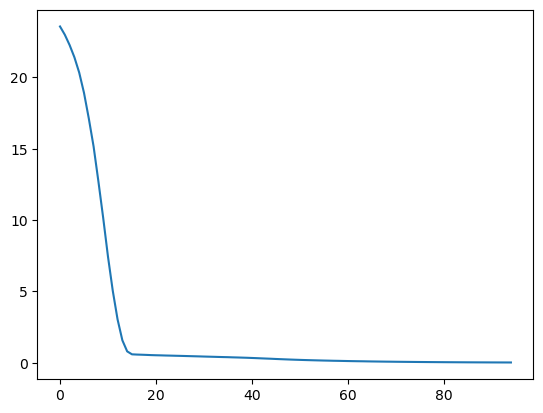

In [84]:
hata_grafigi = model.history.history["loss"]
sbn.lineplot(x=range(len(hata_grafigi)),y = hata_grafigi)

In [85]:
train_score = model.history.history["loss"][len(model.history.history["loss"])-1]
# train_score : eğitim süreci sonunda modelin eğitim verilerine uyumunu ölçen bir değer

In [86]:
train_score

0.02005779929459095

In [87]:
test_tahminleri = model.predict(x_test)

15/15 [==============================] - 0s 1ms/step


In [88]:
tahmin_degerleri = pd.DataFrame(y_test,columns=["Gerçek degerler"])
tahmin_degerleri["Model Tahmini"] = test_tahminleri

In [89]:
tahmin_degerleri

,Gerçek degerler,Model Tahmini
0,3.77,3.429446
1,2.65,2.766951
2,2.62,2.695430
3,2.92,2.959651
4,5.95,5.875213
...,...,...
473,7.95,7.691722
474,2.44,2.536606
475,4.91,4.962729
476,2.59,2.824148


In [90]:
tahmin_degerleri.describe()
#Seri'nin temel istatistiksel bilgileri

,Gerçek degerler,Model Tahmini
count,478.000000,478.000000
mean,4.455900,4.453230
std,2.737633,2.624442
min,0.860000,1.373472
25%,2.530000,2.657490
50%,3.055000,3.073131
75%,5.740000,5.651137
max,13.260000,12.749669


<Axes: xlabel='Gerçek degerler', ylabel='Model Tahmini'>

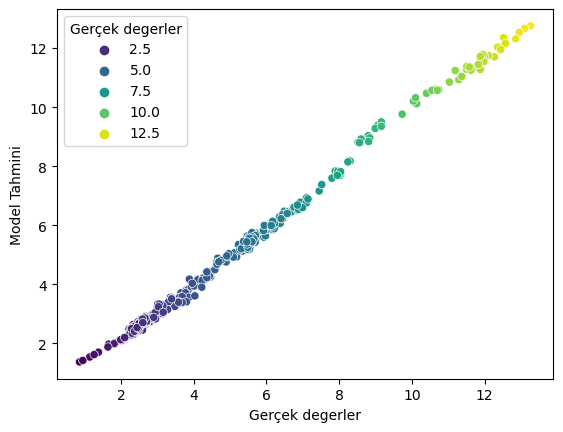

In [91]:
sbn.scatterplot(x="Gerçek degerler", y="Model Tahmini", hue="Gerçek degerler", data=tahmin_degerleri, palette="viridis")
#Gerçek degerler ve Model Tahmini sütunları arasındaki ilişkiyi renklerle vurgulayan bir scatter plot grafiği

In [92]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(tahmin_degerleri["Gerçek degerler"],tahmin_degerleri["Model Tahmini"])
#modelimizde +-0.14420460285003214sapma mevcuttur

0.14420460285003214

# Yeni Tahminlerde bulunalım

In [106]:
yeni_tahmin1 = [[3.70,4.06,3.86,83486328,26,7.0531,1.546,480,194]]
yeni_tahmin2 = [[2.81,3.23,3.05,17666101,27,7.8222,1.377,379,153]]
yeni_tahmin4 = [[11.75,12.30,12,16255501,120,18.5272,7.841,1.416,615]]

In [107]:
yeni_tahmin = scaler.transform(yeni_tahmin1)

In [108]:
yeni_tahmin

array([[0.23451693, 0.25396825, 0.24271845, 0.43627249, 0.01052632,
        0.00584961, 0.06318903, 0.48236621, 0.24542683]])

In [109]:
model.predict(yeni_tahmin)

1/1 [==============================] - 0s 20ms/step


array([[3.8818111]], dtype=float32)

In [110]:
#GERÇEK DEGER 4.06 İKEN MODELİMİZİ TAHMİNİ 3.88 dir 

In [111]:
yeni_tahmin2 = scaler.transform(yeni_tahmin2)

In [112]:
yeni_tahmin2

array([[0.16102395, 0.18809524, 0.17718447, 0.09156678, 0.02105263,
        0.04166919, 0.04046787, 0.38065218, 0.18292683]])

In [113]:
model.predict(yeni_tahmin2)

1/1 [==============================] - 0s 20ms/step


array([[3.0229783]], dtype=float32)

In [114]:
#GERÇEK DEGER 3.20 İKEN MODELİMİZİ TAHMİNİ 3.56 dir 

In [118]:
yeni_tahmin3 = scaler.transform(yeni_tahmin4)

In [119]:
yeni_tahmin3

array([[8.99256813e-01, 9.07936508e-01, 9.01294498e-01, 8.41793581e-02,
        1.00000000e+00, 5.40237058e-01, 9.09518688e-01, 3.98799573e-04,
        8.87195122e-01]])

In [120]:
model.predict(yeni_tahmin3)

1/1 [==============================] - 0s 20ms/step


array([[11.625395]], dtype=float32)

In [ ]:
#GERÇEK DEGER 11.83 İKEN MODELİMİZİ TAHMİNİ  11.625  dir 

Bu veri seti  hissenin  03-09-2020 / 09-11-2023 arasındak borsa verilerini kapsamakatadır 
veri seti Hüseyin Erol tarafından oluşturulmuştur -- kodlar -- github hesabımda 
github_hesabım : https://github.com/HuseyinErol24

# Veri setindebulunmayan güncel veri ile deneyelim

In [126]:
yen_tahmin4_güncel_veri = [[13.67,14.21,13.96,38269467,120,28.304,7.899,1.656,719]]

In [127]:
güncel_veri = scaler.transform(yen_tahmin4_güncel_veri)

In [128]:
güncel_veri

array([[1.05780347e+00, 1.05952381e+00, 1.05987055e+00, 1.99468231e-01,
        1.00000000e+00, 9.95575530e-01, 9.17316483e-01, 6.40496284e-04,
        1.04573171e+00]])

In [129]:
model.predict(güncel_veri)

1/1 [==============================] - 0s 20ms/step


array([[13.163969]], dtype=float32)

In [130]:
#GERÇEK DEGERİMİZ  : 12.83 iken modelimizin tahmini 13.16 dır.

In [131]:
from tensorflow.keras.models import load_model
#modeli kaydetmek için

In [132]:
model.save("Hisse_regresyon_analizi.keras")

In [133]:
#modeli geri çagırmak için

In [134]:
from tensorflow.keras.models import load_model

geri_cagirilan_model = load_model("Hisse_regresyon_analizi.keras")

In [135]:
geri_cagirilan_model